In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset={"protein":[5,20,10,15,30,40,50],"fat":[40,54,50,70,3,6,8],"class":["bad","bad","bad","bad","good","good","good"]}

In [4]:
x1=dataset["protein"]
print(x1)

[5, 20, 10, 15, 30, 40, 50]


In [5]:
x2=dataset["fat"]
print(x2)

[40, 54, 50, 70, 3, 6, 8]


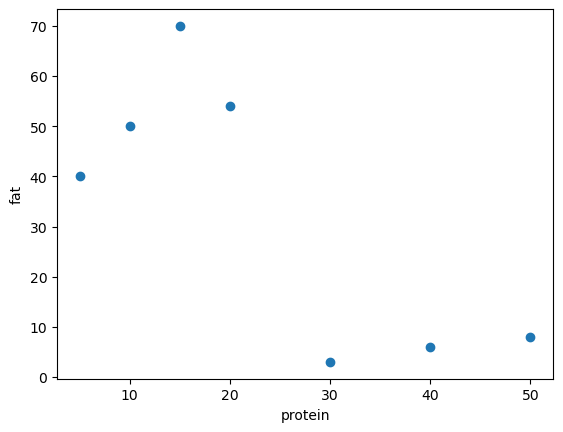

In [6]:
plt.scatter(x1,x2)
plt.xlabel("protein")
plt.ylabel("fat")
plt.show()

for this the line equation for the decision boundary is y= 1*x1 + 1*x2 + (-10) 

now we got the decision boundary line , now we are going to give it to the sigmoid function 

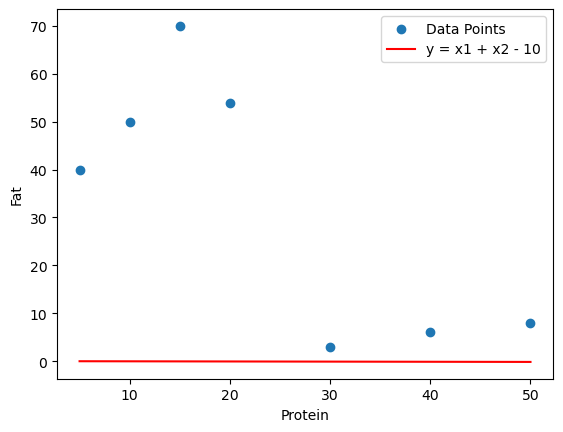

In [43]:
# Define the line equation
def line_equation(x1, x2):
    return 0.195 * np.array(x1) + (-0.1982071 *np.array(x2)) +0.0058043

# Plot the scatter plot
plt.scatter(x1, x2, label='Data Points')

# Plot the line
x_values = np.linspace(min(x1), max(x1), 100) # Generate x values for the line
y_values = line_equation(x_values, x_values) # Calculate y values using the line equation
plt.plot(x_values, y_values, color='red', label='y = x1 + x2 - 10')

# Add labels and legend
plt.xlabel("Protein")
plt.ylabel("Fat")
plt.legend()

# Show the plot
plt.show()

In [40]:
def sigmoid(x, y):
    z = 0.195 * np.array(x) + (-0.1982071 *np.array(y)) +0.0058043
    temp = 1 / (1 + np.exp(-z))
    return temp

In [41]:
sigmoid([30],[10])

array([0.9796424])

In [1]:
import numpy as np 
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [3]:
class LogisticRegression:
    
    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig
    
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    
    def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

In [4]:
model=LogisticRegression()

In [5]:
dataset={"protein":[5,20,10,15,30,40,50],"fat":[40,54,50,70,3,6,8],"class":["bad","bad","bad","bad","good","good","good"]}
x1=dataset["protein"]
x2=dataset["fat"]
y=dataset["class"]

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [12]:
X = np.vstack([x1, x2]).T 
model.fit(X,y)

C:\Users\Sathish\AppData\Local\Temp\ipykernel_10516\3859874127.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_list[i] = cost(weights)


array([0.16035498, 0.05528723, 0.04230132, 0.03535769, 0.03071209,
       0.02727667, 0.02459256, 0.02242096, 0.0206203 , 0.01909925,
       0.01779532, 0.01666393, 0.01567221, 0.01479531, 0.01401406,
       0.01331338, 0.01268124, 0.01210792, 0.01158548, 0.01110734,
       0.01066805, 0.01026299, 0.00988828, 0.00954059, 0.00921708,
       0.00891527, 0.00863304, 0.00836852, 0.00812008, 0.00788628,
       0.00766586, 0.00745769, 0.00726076, 0.00707418, 0.00689715,
       0.00672894, 0.00656892, 0.00641648, 0.0062711 , 0.0061323 ,
       0.00599963, 0.00587269, 0.00575112, 0.00563458, 0.00552276,
       0.00541539, 0.00531218, 0.00521292, 0.00511737, 0.00502532,
       0.00493659, 0.00485101, 0.00476839, 0.00468859, 0.00461147,
       0.0045369 , 0.00446474, 0.00439489, 0.00432723, 0.00426166,
       0.00419808, 0.00413641, 0.00407655, 0.00401844, 0.00396199,
       0.00390713, 0.0038538 , 0.00380193, 0.00375146, 0.00370234,
       0.00365451, 0.00360793, 0.00356254, 0.00351829, 0.00347

In [14]:
model.weights

array([[ 0.00290445],
       [ 0.21927336],
       [-0.21159143]])